In [ ]:
# !python -m venv venv
# # !venv/scripts/activate
!pip install pandas numpy matplotlib seaborn plotly geopandas scipy scikit-learn statsmodels requests streamlit streamlit_jupyter

In [51]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

# Scientific Computing
import scipy

# Machine Learning
import sklearn

# Statistical Models
import statsmodels.api as sm

import requests
import os

import streamlit as st
from streamlit_jupyter import StreamlitPatcher, tqdm
StreamlitPatcher().jupyter()

pd.set_option('display.max_columns', None)

st.title("Exploratory Data Analysis for GPS Jamming")

# Exploratory Data Analysis for GPS Jamming

In [ ]:
'''df = pd.read_json(os.path.join('aircraft_data_2024-02-01','aircraft_data_2024-02-01.json')
df = pd.json_normalize(df['aircraft'])
df'''

In [53]:
# for each timeslice of 5 minutes, find the aircraft-ping with nac_p, nac_v above a certain threshold, 
# and gpsOkBefore, rr_lat, rr_lon if these values are not empty
# (each timeslice is 800kb)
#
# after filtering the timeslice, the filtered data should be much smaller say 10 kb
#
# define array of locations (squares) according to lat and lon limits
# 
# loop through all timeslice-aircraft-ping and find location and append
# 
# loop through all locations and run the data through the classification function to determine the color

url = 'https://samples.adsbexchange.com/readsb-hist/2024/02/01/000000Z.json.gz'
response = requests.get(url)
json_data = response.json()
df1 = pd.json_normalize(json_data['aircraft'])

In [54]:
option = st.multiselect(
    "Filter",
    options=["adsb_icao","other","adsb_icao_nt","mode_s","adsr_icao","tisb_other","tisb_trackfile","mlat","unknown","tisb_icao","adsb_other"],
)

st.write("You selected:", option)

SelectMultiple(description='Filter', options=('adsb_icao', 'other', 'adsb_icao_nt', 'mode_s', 'adsr_icao', 'ti…

You selected:

()

List all type with counts type
adsb_icao         9145
other              725
adsb_icao_nt       524
mode_s             515
adsr_icao          280
tisb_other         256
tisb_trackfile     214
mlat               116
unknown             49
tisb_icao           31
adsb_other          17
Name: count, dtype: int64


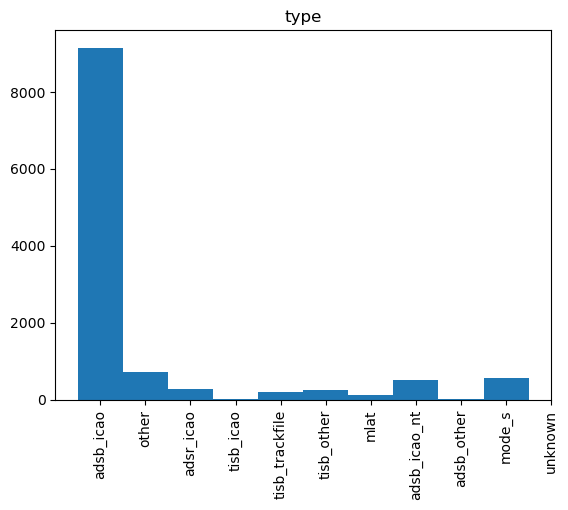

In [55]:
print(f"List all type with counts {df1['type'].value_counts()}")
# List all type with counts type
# adsb_icao         9145 - messages from a Mode S or ADS-B transponder, using a 24-bit ICAO address
# other              725 - IGNORE miscellaneous data received via Basestation / SBS format, quality / source is unknown.
# adsb_icao_nt       524 - IGNORE - messages from an ADS-B equipped “non-transponder” emitter e.g. a ground vehicle, using a 24-bit ICAO address
# mode_s             515 - ModeS data from the planes transponder (no position transmitted)
# adsr_icao          280 - rebroadcast of ADS-B messages originally sent via another data link e.g. UAT, using a 24-bit ICAO address
# tisb_other         256 - traffic information about a non-ADS-B target using a non-ICAO address
# tisb_trackfile     214 - traffic information about a non-ADS-B target using a track/file identifier, typically from primary or Mode A/C radar
# mlat               116 - MLAT, position calculated arrival time differences using multiple receivers, outliers and varying accuracy is expected.
# unknown             49
# tisb_icao           31 - traffic information about a non-ADS-B target identified by a 24-bit ICAO address, e.g. a Mode S target tracked by secondary radar
# adsb_other          17 - messages from an ADS-B transponder using a non-ICAO address, e.g. anonymized address
plt.hist(df1['type'], align='left')
plt.title('type')
plt.xticks(rotation='vertical')
plt.show()

In [18]:

df1_filtered = df1[df1[['nac_p','nac_v']].notnull().all(1)]
nacp_high = df1_filtered[df1_filtered['nac_p']<8]
nacp_high
# rr_lat not null
# rr_lon not null
# lastPosition.lat / lastPosition.lon not null

,hex,type,flight,r,t,alt_baro,alt_geom,gs,track,geom_rate,squawk,emergency,category,nav_qnh,nav_altitude_mcp,nav_heading,nav_modes,lat,lon,nic,rc,seen_pos,version,nic_baro,nac_p,nac_v,sil,sil_type,gva,sda,alert,spi,mlat,tisb,messages,seen,rssi,baro_rate,dbFlags,true_heading,mag_heading,nav_altitude_fms,ias,tas,mach,wd,ws,oat,tat,track_rate,roll,calc_track,rr_lat,rr_lon,gpsOkBefore,gpsOkLat,gpsOkLon,lastPosition.lat,lastPosition.lon,lastPosition.nic,lastPosition.rc,lastPosition.seen_pos
18,a078ec,tisb_icao,N13AV,N13AV,GA8,1075,1000.0,106.5,170.27,-64.0,NaN,NaN,A1,NaN,NaN,NaN,NaN,61.370682,-162.030781,0.0,0.0,0.319,NaN,NaN,0.0,0.0,0.0,perhour,NaN,NaN,0.0,0.0,[],"[callsign, altitude, alt_geom, gs, track, geom...",6171494,0.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,a375c9,tisb_icao,N322AL,N322AL,R44,2500,2625.0,115.8,343.44,NaN,NaN,NaN,A7,NaN,NaN,NaN,NaN,22.024521,-159.608926,0.0,0.0,7.305,NaN,NaN,0.0,0.0,0.0,perhour,NaN,NaN,0.0,0.0,[],"[callsign, altitude, alt_geom, gs, track, baro...",1220826,7.3,-24.6,-576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,a99e71,tisb_icao,N719KV,N719KV,H500,2125,2300.0,86.7,320.62,NaN,NaN,NaN,A7,NaN,NaN,NaN,NaN,21.978012,-159.537614,0.0,0.0,7.305,NaN,NaN,0.0,0.0,0.0,perhour,NaN,NaN,0.0,0.0,[],"[callsign, altitude, alt_geom, gs, track, baro...",7252550,7.3,-24.3,-384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,ad68dc,tisb_icao,N963SA,N963SA,AS50,150,200.0,0.7,0.00,NaN,NaN,NaN,A7,NaN,NaN,NaN,NaN,21.982590,-159.345753,0.0,0.0,7.305,NaN,NaN,0.0,0.0,0.0,perhour,NaN,NaN,0.0,0.0,[],"[callsign, altitude, alt_geom, gs, track, baro...",5240213,7.3,-24.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,ab8817,tisb_icao,N842JH,N842JH,H500,100,175.0,0.7,0.00,NaN,NaN,NaN,A7,NaN,NaN,NaN,NaN,21.984879,-159.341808,0.0,0.0,7.747,NaN,NaN,0.0,0.0,0.0,perhour,NaN,NaN,0.0,0.0,[],"[callsign, altitude, alt_geom, gs, track, baro...",6648127,7.7,-24.6,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11835,71c006,mode_s,KAL938,HL8006,B77W,35100,NaN,502.0,92.64,-32.0,7103,none,A5,1012.8,35104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,0.0,0.0,persample,0.0,2.0,0.0,0.0,[],[],27604276,43.8,-19.4,0.0,NaN,92.11,87.54,NaN,278.0,460.0,0.816,NaN,NaN,-64.0,-36.0,NaN,0.18,NaN,44.9,76.2,NaN,NaN,NaN,41.821693,40.110958,0.0,0.0,12856.947
11840,7810c7,mode_s,GCR7966,B-8659,A332,37000,NaN,502.0,92.11,0.0,3455,none,A5,1013.6,36992.0,57.66,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,0.0,0.0,persample,0.0,2.0,0.0,0.0,[],[],10484381,0.0,-12.0,0.0,NaN,90.00,79.10,NaN,263.0,460.0,0.808,NaN,NaN,-60.0,-32.0,-0.06,-0.70,NaN,54.9,36.8,NaN,NaN,NaN,56.399619,27.730780,0.0,0.0,2492.005
11854,7c4ef0,mode_s,PVM,VH-PVM,TBM7,ground,NaN,NaN,NaN,NaN,3650,none,A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0,0.0,3.0,perhour,NaN,2.0,NaN,NaN,[],[],4701345,0.6,-20.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.8,151.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11855,4ba9fa,mode_s,THY6284,TC-JOZ,A332,36000,NaN,440.0,317.29,0.0,4075,none,A5,1012.8,36000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,0.0,0.0,perhour,0.0,3.0,0.0,0.0,[],[],35754003,0.0,-15.1,0.0,NaN,312.19,306.74,NaN,266.0,468.0,0.800,NaN,NaN,-48.0,-19.0,-0.12,-4.57,NaN,36.6,42.9,NaN,NaN,NaN,35.351863,44.282616,4.0,3704.0,1043.811


List all ADSB versions with counts version
2.0    8881
0.0    1119
1.0     141
4.0       2
7.0       2
6.0       1
Name: count, dtype: int64


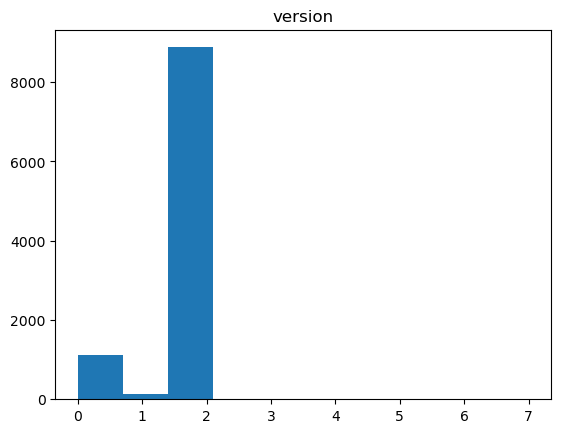

In [26]:
print(f"List all ADSB versions with counts {df1['version'].value_counts()}")
# version: ADS-B Version Number 0, 1, 2 (3-7 are reserved) (2.2.3.2.7.5)
# List all ADSB versions with counts version
# 2.0    8881
# 0.0    1119
# 1.0     141
plt.hist(df1['version'])
plt.title('version')
plt.show()

List all nac_p values with counts nac_p
10.0    4938
9.0     3297
8.0      874
11.0     454
0.0      449
7.0       75
6.0       52
5.0       10
4.0        5
1.0        5
Name: count, dtype: int64


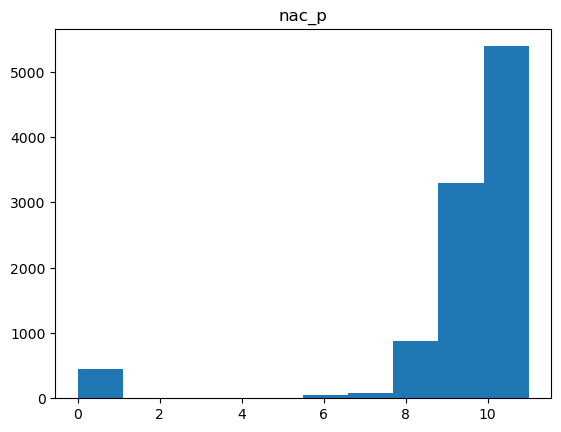

In [8]:
# nac_p: Navigation Accuracy for Position (2.2.5.1.35)
counts = df1['nac_p'].value_counts()
print(f"List all nac_p values with counts {counts}")
plt.hist(df1['nac_p'])
plt.title('nac_p')
plt.show()

List all nac_v values with counts nac_v
2.0    4896
1.0    3896
0.0     664
4.0     290
3.0      14
7.0      10
Name: count, dtype: int64


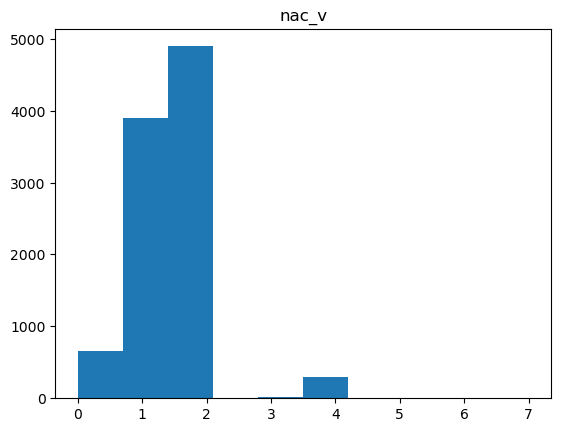

In [56]:
# nac_v: Navigation Accuracy for Velocity (2.2.5.1.19)
counts = df1['nac_v'].value_counts()
print(f"List all nac_v values with counts {counts}")
plt.hist(df1['nac_v'])
plt.title('nac_v')
plt.show()

List all roll with counts roll
 0.00    385
-0.18    308
 0.18    297
-0.35    189
 0.35    166
        ... 
-3.34      1
-6.33      1
-6.86      1
 9.84      1
 2.11      1
Name: count, Length: 143, dtype: int64


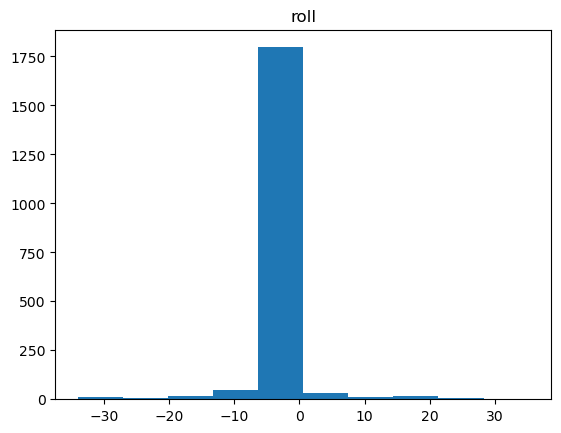

In [25]:
# roll: Roll, degrees, negative is left roll
counts = df1['roll'].value_counts()
print(f"List all roll with counts {counts}")
plt.hist(df1['roll'], align='left')
plt.title('roll')
plt.show()

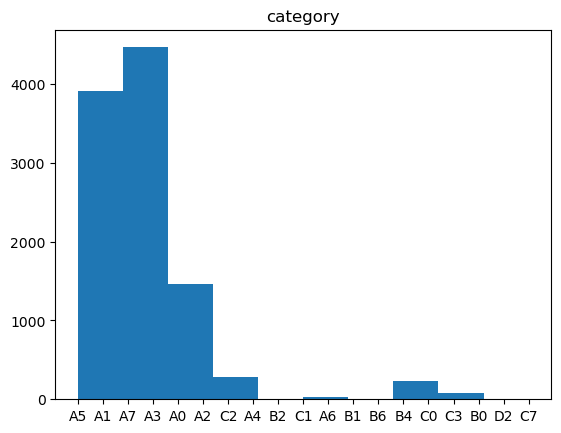

In [59]:
# category: emitter category to identify particular aircraft or vehicle classes (values A0 – D7) (2.2.3.2.5.2)
counts = df1['category'].dropna()
# print(f"List all category with counts {counts}")
plt.hist(counts)
plt.title('category')
plt.show()
# A0 : No ADS-B emitter category information. Do not use this emitter category. If no emitter category fits your installation, seek guidance from the FAA as appropriate. A1 : Light (< 15500 lbs) – Any airplane with a maximum takeoff weight less than 15,500 pounds. This includes very light aircraft (light sport aircraft) that do not meet the requirements of 14 CFR § 103.1.
# A2 : Small (15500 to 75000 lbs) – Any airplane with a maximum takeoff weight greater than or equal to15,500 pounds but less than 75,000 pounds.
# A3 : Large (75000 to 300000 lbs) – Any airplane with a maximum takeoff weight greater than or equal to 75,000 pounds but less than 300,000 pounds that does not qualify for the high vortex category.
# A4 :  High vortex large (aircraft such as B-757) – Any airplane with a maximum takeoff weight greater than or equal to 75,000 pounds but less than 300,000 pounds that has been determined to generate a high wake vortex. Currently, the Boeing 757 is the only example.
# A5 : Heavy (> 300000 lbs) – Any airplane with a maximum takeoff weight equal to or above 300,000 pounds.
# A6 : High performance (> 5g acceleration and 400 kts) – Any airplane, regardless of weight, which can maneuver in excess of 5 G’s and maintain true airspeed above 400 knots.
# A7 : Rotorcraft – Any rotorcraft regardless of weight.
# B0 : No ADS-B emitter category information
# B1 : Glider / sailplane – Any glider or sailplane regardless of weight.
# B2 : Lighter-than-air – Any lighter than air (airship or balloon) regardless of weight.
# B3 : Parachutist / skydiver
# B4 : Ultralight / hang-glider / paraglider – A vehicle that meets the requirements of 14 CFR § 103.1. Light sport aircraft should not use the ultralight emitter category unless they meet 14 CFR § 103.1.
# B5 : Reserved
# B6 : Unmanned aerial vehicle – Any unmanned aerial vehicle or unmanned aircraft system regardless of weight.
# B7 : Space / trans-atmospheric vehicle
# C0 : No ADS-B emitter category information
# C1 : Surface vehicle – emergency vehicle
# C2 : Surface vehicle – service vehicle
# C3 : Point obstacle (includes tethered balloons)
# C4 : Cluster obstacle
# C5 : Line obstacle
# C6 : Reserved
# C7 : Reserved

List all nic values with counts nic
8.0     6867
9.0     1944
0.0     1380
10.0     328
7.0      170
11.0     126
6.0       62
5.0        8
4.0        4
2.0        1
Name: count, dtype: int64


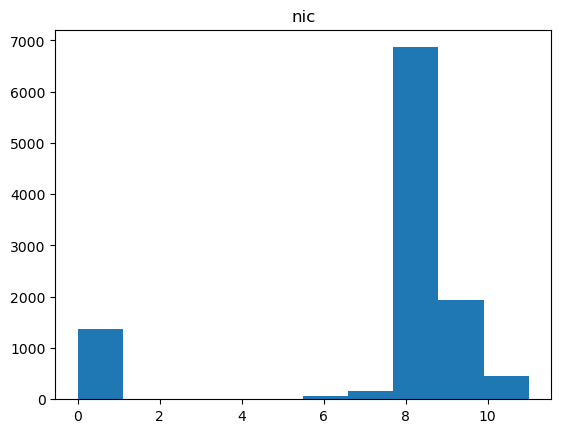

In [61]:
# Change in NIC/NAC/SIL indicates an anomaly, which may be due to any reason

# nic: Navigation Integrity Category (2.2.3.2.7.2.6)
# Table 1: NIC value and corresponding size of containment radius
# NIC Containment Radius
# 0 Unknown
# 1 Rc < 37.04km (20nm)
# 2 Rc < 14.816km (8nm)
# 3 Rc < 7.408km (4nm)
# 4 Rc < 3.704km (2nm)
# 5 Rc < 1852m (1nm)
# 6 Rc < 1111.2m (0.6nm)
# Rc < 926m (0.5nm)
# Rc < 555.6m (0.3nm)
# 7 Rc < 370.4m (0.2nm)
# 8 Rc < 185.2m (0.1nm)
# 9 Rc < 75m
# 10 Rc < 25m
# 11 Rc < 7.5m
counts = df1['nic'].value_counts()
print(f"List all nic values with counts {counts}")
plt.hist(df1['nic'])
plt.title('nic')
plt.show()

List all sil values with counts sil
3.0    8590
2.0    1332
0.0     231
1.0       6
Name: count, dtype: int64


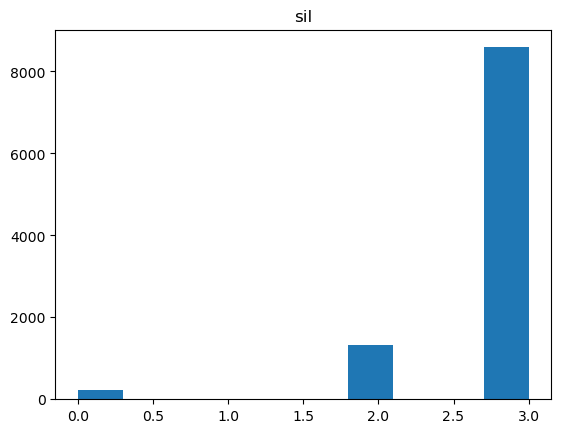

In [64]:
counts = df1['sil'].value_counts()
print(f"List all sil values with counts {counts}")
plt.hist(df1['sil'])
plt.title('sil')
plt.show()

In [ ]:
url2 = 'https://samples.adsbexchange.com/readsb-hist/2024/02/01/000005Z.json.gz'
response2 = requests.get(url2)
json_data2 = response2.json()
df2 = pd.json_normalize(json_data2['aircraft'])
url3 = 'https://samples.adsbexchange.com/readsb-hist/2024/02/01/000010Z.json.gz'
response3 = requests.get(url3)
json_data3 = response2.json()
df3 = pd.json_normalize(json_data3['aircraft'])
url4 = 'https://samples.adsbexchange.com/readsb-hist/2024/02/01/000015Z.json.gz'
response4 = requests.get(url4)
json_data4 = response2.json()
df4 = pd.json_normalize(json_data4['aircraft'])